# Classification on Origin of Wines

* This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
* This dataset is accessed through the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine)
* We will be using this dataset to perform classification of wines based on the its chemical content using random forest 

![](./images/cover.jpg)

In [1]:
# import library 

from ucimlrepo import fetch_ucirepo

In [32]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
import numpy as np
import pandas as pd

In [3]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
y = y.squeeze()

# print features 
# print(wine.variables) 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
y_train = np.ravel(y_train)

In [6]:
classifier = RandomForestClassifier(n_estimators=100,random_state=42,bootstrap=True)

In [7]:
cv_acc_scores = cross_val_score(classifier,X_train,y_train,cv=5,n_jobs=-1)
print(cv_acc_scores)

[1.         1.         0.92857143 0.96428571 1.        ]


In [11]:
params = {
    "n_estimators": range(25,100,25),
    "max_depth":range(10,50,10),
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 50, 10)}

In [13]:
model = GridSearchCV(
    estimator=classifier,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [14]:
# Train model
model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [17]:
result_df = pd.DataFrame(model.cv_results_)

In [18]:
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045371,0.001763,0.004751,0.000158,10,25,"{'max_depth': 10, 'n_estimators': 25}",1.0,1.0,0.964286,0.892857,1.0,0.971429,0.041650,5
1,0.095895,0.002795,0.007163,0.000572,10,50,"{'max_depth': 10, 'n_estimators': 50}",1.0,1.0,0.928571,0.928571,1.0,0.971429,0.034993,5
2,0.140802,0.003268,0.010181,0.000136,10,75,"{'max_depth': 10, 'n_estimators': 75}",1.0,1.0,0.928571,0.964286,1.0,0.978571,0.028571,1
3,0.051753,0.003277,0.004762,0.000197,20,25,"{'max_depth': 20, 'n_estimators': 25}",1.0,1.0,0.964286,0.892857,1.0,0.971429,0.041650,5
4,0.096542,0.000850,0.006930,0.000692,20,50,"{'max_depth': 20, 'n_estimators': 50}",1.0,1.0,0.928571,0.928571,1.0,0.971429,0.034993,5
5,0.136866,0.007959,0.009593,0.001554,20,75,"{'max_depth': 20, 'n_estimators': 75}",1.0,1.0,0.928571,0.964286,1.0,0.978571,0.028571,1
6,0.045906,0.000938,0.004419,0.000391,30,25,"{'max_depth': 30, 'n_estimators': 25}",1.0,1.0,0.964286,0.892857,1.0,0.971429,0.041650,5
7,0.087211,0.002782,0.006895,0.000324,30,50,"{'max_depth': 30, 'n_estimators': 50}",1.0,1.0,0.928571,0.928571,1.0,0.971429,0.034993,5
8,0.134939,0.008631,0.009468,0.000485,30,75,"{'max_depth': 30, 'n_estimators': 75}",1.0,1.0,0.928571,0.964286,1.0,0.978571,0.028571,1
9,0.045483,0.001207,0.004894,0.000422,40,25,"{'max_depth': 40, 'n_estimators': 25}",1.0,1.0,0.964286,0.892857,1.0,0.971429,0.041650,5


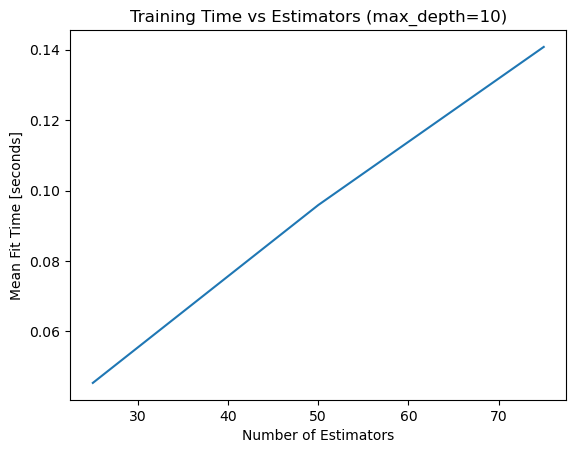

In [23]:
# Create mask
mask = result_df['param_max_depth']==10

# Plot fit time vs n_estimators

plt.plot(result_df[mask]['param_n_estimators'],
        result_df[mask]['mean_fit_time'])

# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

In [21]:
import matplotlib.pyplot as plt

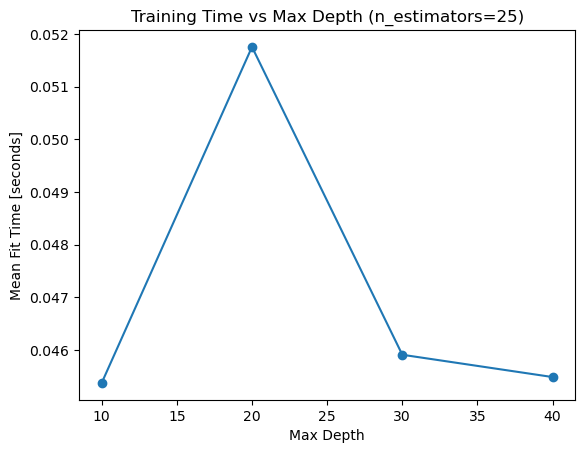

In [26]:
# Create mask
mask = result_df['param_n_estimators']==25
# Plot fit time vs max_depth

plt.plot(result_df[mask]['param_max_depth'],
        result_df[mask]['mean_fit_time']
        
        )
plt.scatter(result_df[mask]['param_max_depth'],
        result_df[mask]['mean_fit_time']
        
        )
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [27]:
model.best_params_

{'max_depth': 10, 'n_estimators': 75}

In [28]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 1.0


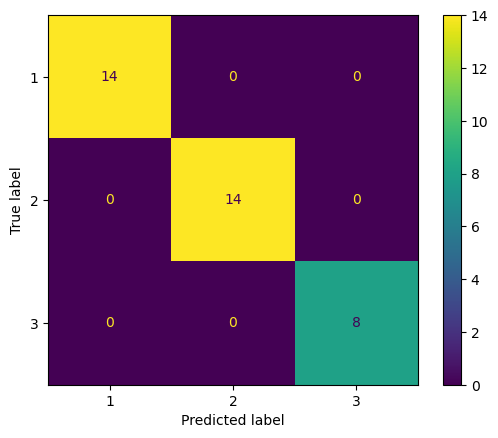

In [29]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

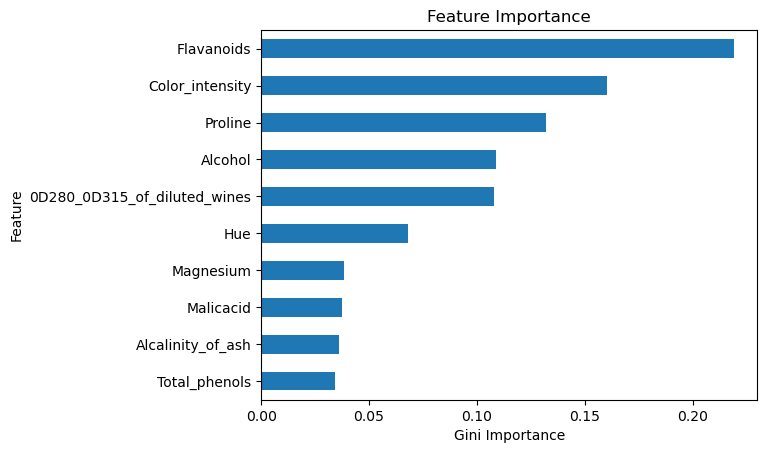

In [31]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = model.best_estimator_.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(data=importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [ ]:
model.best_estimator_.feature_importances_

In [33]:
# Print classification report
classification_report(y_test,model.predict(X_test))
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
ss